In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.axes3d as p3

In [2]:
class Particle_2():
    
    def __init__(self, r0,v0,a0,t,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.Id = Id
        
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)

        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=3):
        
        for i in range(dim):
            
            if self.r[i] > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] < - limits[i]:
                self.v[i] = - self.v[i]
                
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])



In [3]:
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

In [4]:
def GetParticles(NParticles,Limit,Velo=50,Dim=3,dt=dt):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle_2(x0,v0,a0,t,i)
        
        Particles_.append(p)
        
    return Particles_

In [5]:
Limits = np.array([10.,10.,10.])

In [6]:
def RunSimulation2(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles

In [7]:
Particles2 = RunSimulation2(t, Velo=6)

100%|██████████| 3001/3001 [00:04<00:00, 708.38it/s]


In [8]:
def ReduceTime(t,factor):
    
    for p in Particles2:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [9]:
redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


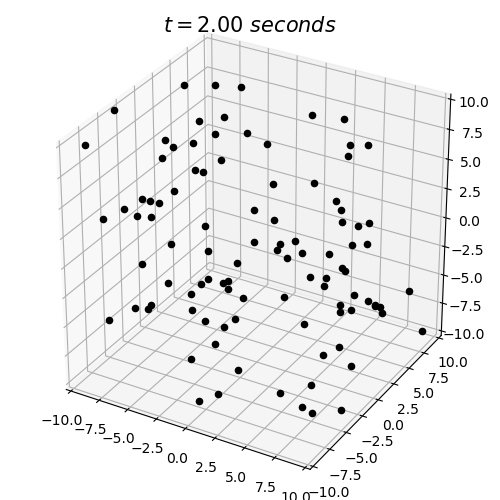

In [10]:
fig2 = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig2)

def init():
    ax.set_xlim3d(-Limits[0],Limits[0])
    ax.set_ylim3d(-Limits[1],Limits[1])
    ax.set_zlim3d(-Limits[2],Limits[2])
    
    
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles2:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        plot=ax.scatter(x,y,z, c="k")
        
    return plot

Animation = anim.FuncAnimation(fig2,Update,frames=len(redt),init_func=init)

In [11]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=30, metadata=dict(artist='Me'))
Animation.save('Gas 3D.mp4', writer=writer_)